**Observation  Anjali Mangal **
1. Total number of rides and drivers is way higher in Urban cities than other 
2. Total money and market in Urban is determined by Total fair collected per city type  , Urban areas are best for these oppurtunities and new buisnesses .
3.Fare in Rural area is relatively high so their average fare is higher than urban and suburban .

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
try :
    combined_df = pd.merge(city_data,ride_data,on = 'city')
except Exception as e:
    print (e,type(e))
    
# Display the data table for preview

combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

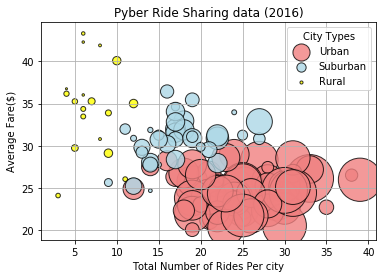

In [3]:
suburban_df =combined_df[combined_df['type'] =='Suburban']    
urban_df = combined_df[combined_df['type'] =='Urban'] 
rural_df = combined_df[combined_df['type'] =='Rural'] 

suburban_avg_fare = suburban_df.groupby('city')['fare'].mean()
suburban_rides = suburban_df.groupby('city')['ride_id'].count()
suburban_driver = suburban_df.groupby('city')['driver_count'].sum()

urban_avg_fare = urban_df.groupby('city')['fare'].mean()
urban_rides = urban_df.groupby('city')['ride_id'].count()
urban_driver = urban_df.groupby('city')['driver_count'].sum()

rural_avg_fare = rural_df.groupby('city')['fare'].mean()
rural_rides = rural_df.groupby('city')['ride_id'].count()
rural_driver = rural_df.groupby('city')['driver_count'].sum()
legend_label = ['Urban','Sub','Rural']

urban_plot = plt.scatter(urban_rides,urban_avg_fare, s=urban_driver, c="lightcoral",alpha=0.8,edgecolor = "black", marker="o", label='Urban')
suburban_plot = plt.scatter(suburban_rides,suburban_avg_fare, s=suburban_driver, c='lightblue',alpha=0.8,edgecolor = "black", marker="o", label='Suburban')
rural_plot = plt.scatter(rural_rides,rural_avg_fare, s=rural_driver, c="yellow",alpha=0.8,edgecolor = "black", marker="o", label='Rural')
plt.legend(loc='best',title = 'City Types',markerscale=0.5);
plt.title("Pyber Ride Sharing data (2016)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides Per city")
plt.grid()
plt.show()

## Total Fares by City Type

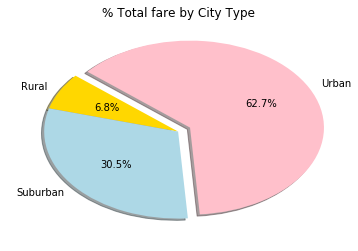

In [4]:
# Calculate Type Percents

data_by_CityType = combined_df.groupby('type')
total_fare_perType = data_by_CityType["fare"].sum()

colors = ["gold","lightblue","pink"]
explode = (0,0,0.1)
labels_types = total_fare_perType.index



plt.pie(total_fare_perType,explode=explode,labels = labels_types,colors=colors ,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Total fare by City Type")


# Build Pie Chart

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/fairsPies.png")
plt.show()


## Total Rides by City Type

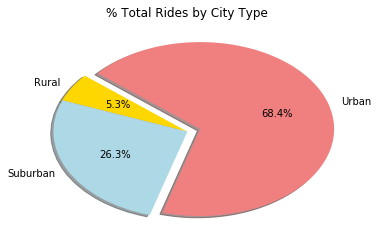

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Ride Percents
total_rides_per_city = data_by_CityType['ride_id'].count()
total_rides_per_city
labels_types = total_rides_per_city.index
colors = ["gold","lightblue","lightcoral"]
explode = [0,0,0.1]
# Build Pie Chart

plt.pie(total_rides_per_city,explode = explode,labels = labels_types,colors=colors ,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Rides by City Type")

plt.show()

# Save Figure
plt.savefig("../Images/ridesPies.png")

## Total Drivers by City Type

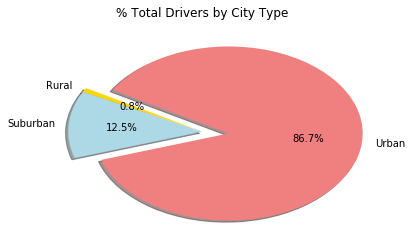

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Driver Percents

total_drivers_citytype = data_by_CityType['driver_count'].sum()
driver_label = total_drivers_citytype.index
colors = ["gold","lightblue","lightcoral"]
explode = [0,0,0.2]
# Build Pie Chart

plt.pie(total_drivers_citytype,explode = explode,labels = driver_label,colors=colors ,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% Total Drivers by City Type")

plt.show()


# Save Figure
plt.savefig("../Images/driversPies.png")
